In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
import seaborn as sns
import plotly.express as px
import plotly.figure_factory as ff
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
import warnings
warnings.filterwarnings("ignore")

### Importing the data as a pandas dataframe 

In [3]:
from azureml.core import Workspace, Dataset

subscription_id = 'fa3dfb7e-5583-41a5-b60c-022e3fcc2942'
resource_group = 'mlops-rg-templateml'
workspace_name = 'mlops-aml-ws-templateml'

workspace = Workspace(subscription_id, resource_group, workspace_name)

dataset = Dataset.get_by_name(workspace, name='HealthCareDataset_StrokeData')
data = dataset.to_pandas_dataframe()

In [4]:
data

id  gender   age  hypertension  heart_disease  ever_married  \
0      9046    Male  67.0             0              1          True   
1     51676  Female  61.0             0              0          True   
2     31112    Male  80.0             0              1          True   
3     60182  Female  49.0             0              0          True   
4      1665  Female  79.0             1              0          True   
...     ...     ...   ...           ...            ...           ...   
5105  18234  Female  80.0             1              0          True   
5106  44873  Female  81.0             0              0          True   
5107  19723  Female  35.0             0              0          True   
5108  37544    Male  51.0             0              0          True   
5109  44679  Female  44.0             0              0          True   

          work_type Residence_type  avg_glucose_level   bmi   smoking_status  \
0           Private          Urban             228.69  36.6  formerly smoked   
1     Self-employed          Rural             202.21   N/A     never smoked   
2           Private          Rural             105.92  32.5     never smoked   
3           Private          Urban             171.23  34.4           smokes   
4     Self-employed          Rural             174.12    24     never smoked   
...             ...            ...                ...   ...              ...   
5105        Private          Urban              83.75   N/A     never smoked   
5106  Self-employed          Urban             125.20    40     never smoked   
5107  Self-employed          Rural              82.99  30.6     never smoked   
5108        Private          Rural             166.29  25.6  formerly smoked   
5109       Govt_job          Urban              85.28  26.2          Unknown   

      stroke  
0          1  
1          1  
2          1  
3          1  
4          1  
...      ...  
5105       0  
5106       0  
5107       0  
5108       0  
5109       0  

[5110 rows x 12 columns]

### Data Analysis 

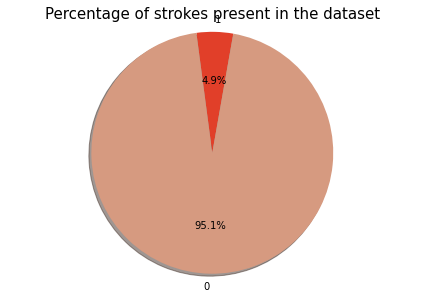

In [4]:
stroke=Counter(data['stroke'])
classes=[]
count=[]   #list to store no of laels of each class
for i in stroke.keys():
    classes.append(i)
    count.append(stroke[i])
colors = ["#E13F29", "#D69A80"]

plt.pie(
    count,
    labels = classes,
    shadow = True,
    colors = colors,
    startangle=80,
    autopct='%1.1f%%'
)
plt.axis('equal')
plt.tight_layout()
plt.title("Percentage of strokes present in the dataset", fontsize=15)
plt.show()

Only 4.9% of people are affected by stroke so the data available to us is imbalanced and we need to balance it before giving to our machine learning algorithms.

####  Distribution of each attribute

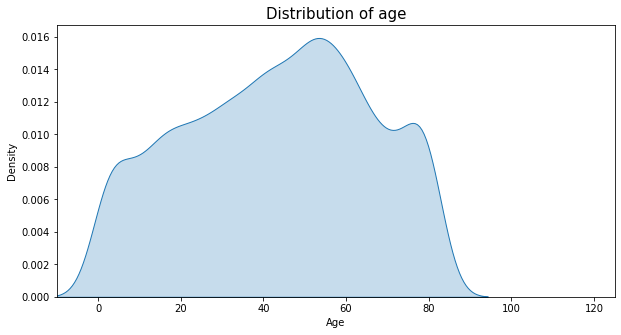

In [10]:
plt.figure(figsize=(10,5))
plt.xlim(-10,125)
plt.xlabel('Age')
plt.ylabel('Density')
sns.kdeplot(data['age'],shade=True)
plt.title('Distribution of age', fontsize=15)
plt.show()

In [11]:
stroke = data[data['stroke']==1]['age'].fillna(0.0).astype(float)
stroke_no = data[data['stroke']==0]['age'].fillna(0.0).astype(float)
fig = ff.create_distplot([stroke, stroke_no], ['Stroke','No Stroke'], bin_size=0.65, curve_type='normal'
                        ,colors =  ['#221F1F','#E50914'])
fig.update_layout(
    title="Stroke distibution over age",
    xaxis_title="Age",
)
fig.show()

Female    2994
Male      2115
Other        1
Name: gender, dtype: int64


Text(0.5, 1.0, 'Distribution of gender')

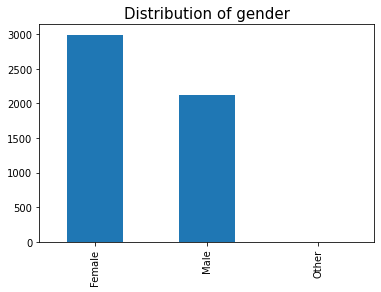

In [12]:
data['gender'].value_counts().plot(kind='bar')
print(data['gender'].value_counts())
plt.title('Distribution of gender', fontsize=15)

Percentage of male and female suffers from stroke
gender
Female    0.047094
Male      0.051064
Other     0.000000
Name: stroke, dtype: float64


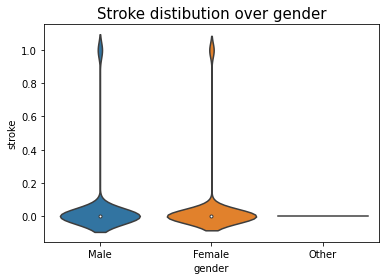

In [13]:
sns.violinplot(x = 'gender', y = 'stroke', data = data)
plt.title('Stroke distibution over gender', fontsize=15)
print("Percentage of male and female suffers from stroke")
print(data.groupby('gender').stroke.apply(lambda x: (x == 1).mean()))

0    4612
1     498
Name: hypertension, dtype: int64


Text(0.5, 1.0, 'Distribution of hypertension')

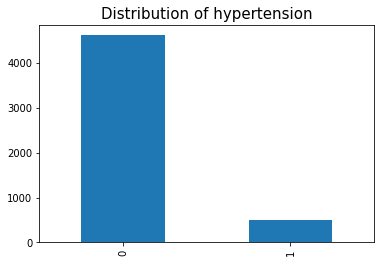

In [14]:
data['hypertension'].value_counts().plot(kind='bar')
print(data['hypertension'].value_counts())
plt.title('Distribution of hypertension', fontsize=15)

Percentage of people with and without hypertension suffering from stroke
hypertension
0    0.039679
1    0.132530
Name: stroke, dtype: float64


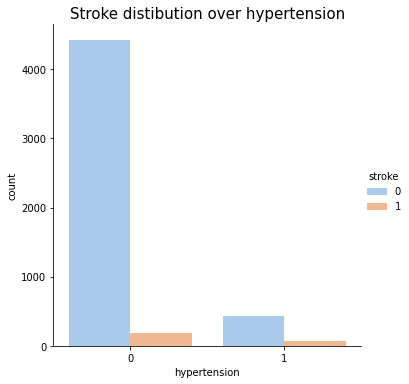

In [16]:
sns.catplot(x="hypertension", hue="stroke",palette="pastel", kind="count",data=data)
plt.title('Stroke distibution over hypertension', fontsize=15)
print("Percentage of people with and without hypertension suffering from stroke")
print(data.groupby('hypertension').stroke.apply(lambda x: (x == 1).mean()))

Text(0.5, 1.0, 'Distribution of Avg. Glucose Level')

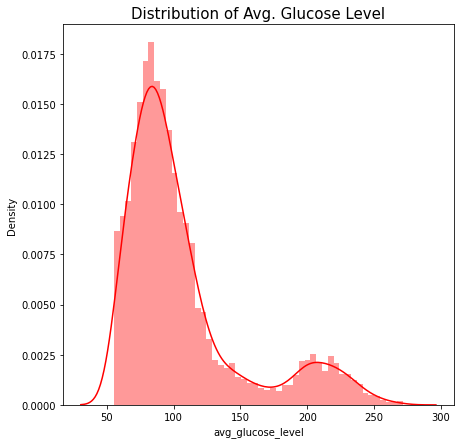

In [18]:
fig = plt.figure(figsize=(7,7))
sns.distplot(data['avg_glucose_level'], color="red",  kde= True)
plt.title('Distribution of Avg. Glucose Level', fontsize=15)

In [19]:
stroke = data[data['stroke']==1]['avg_glucose_level'].fillna(0.0).astype(float)
stroke_no = data[data['stroke']==0]['avg_glucose_level'].fillna(0.0).astype(float)
fig = ff.create_distplot([stroke, stroke_no], ['Stroke','No Stroke'], bin_size=0.65, curve_type='normal'
                        ,colors =  ['#221F1F','green'])
fig.update_layout(
    title="Stroke distibution over avg glucose level",
    xaxis_title="Avg glucose level",
)
fig.show()

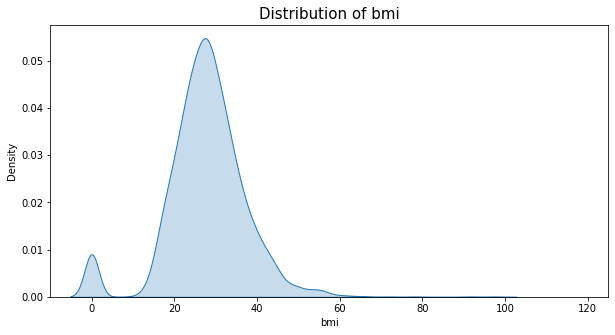

In [35]:
plt.figure(figsize=(10,5))
plt.xlim(-10,125)
plt.xlabel('bmi')
plt.ylabel('Density')
data['bmi'] = data['bmi'].replace('N/A', 0)
# data_altered = data_altered.astype('float')
sns.kdeplot(data['bmi'].astype('float'),shade=True)
plt.title('Distribution of bmi', fontsize=15)
plt.show()

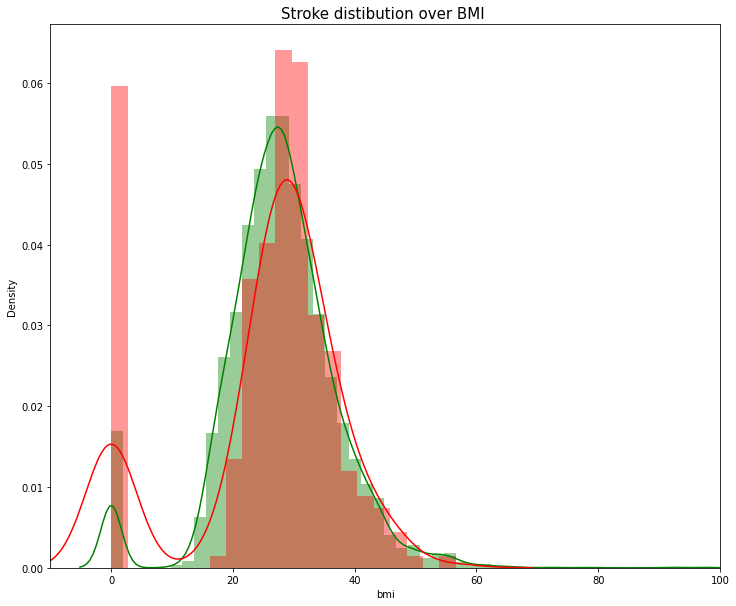

In [36]:
plt.figure(figsize=(12,10))

sns.distplot(data[data['stroke'] == 0]["bmi"], color='green') 
sns.distplot(data[data['stroke'] == 1]["bmi"], color='red') 

plt.title('Stroke distibution over BMI ', fontsize=15)
plt.xlim([-10,100])
plt.show()

Text(0.5, 1.0, 'Distribution of stroke w.r.t age')

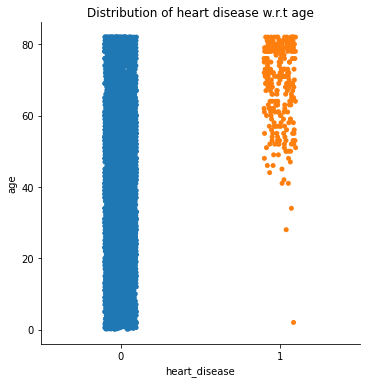

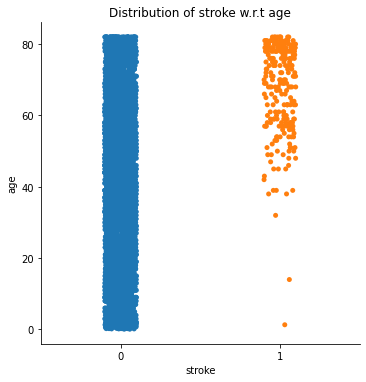

In [37]:
sns.catplot(x="heart_disease", y="age", order=[0, 1], data=data)
plt.title("Distribution of heart disease w.r.t age")
sns.catplot(x="stroke", y="age", order=[0, 1], data=data)
plt.title("Distribution of stroke w.r.t age")

heart_disease
0    0.041787
1    0.170290
Name: stroke, dtype: float64


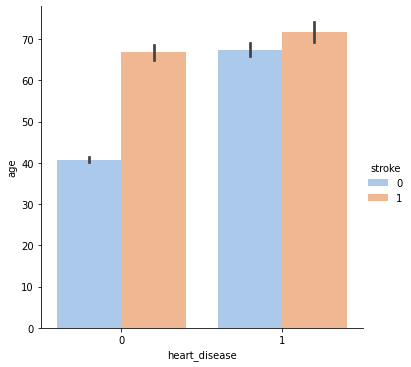

In [38]:
sns.catplot(x="heart_disease", y="age", hue="stroke",palette="pastel", kind="bar", data=data)
print(data.groupby('heart_disease').stroke.apply(lambda x: (x == 1).mean()))

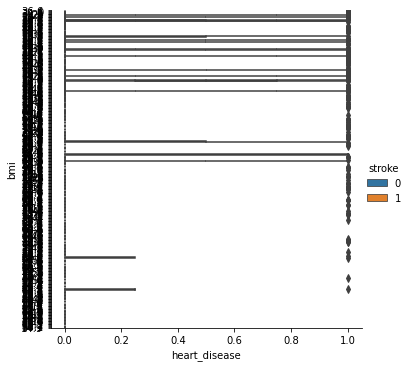

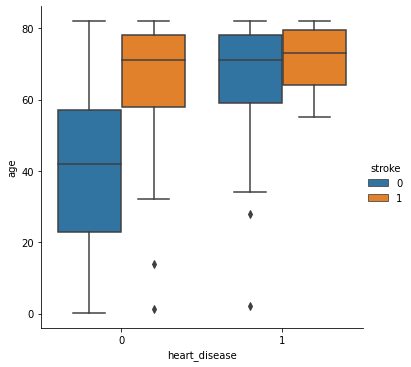

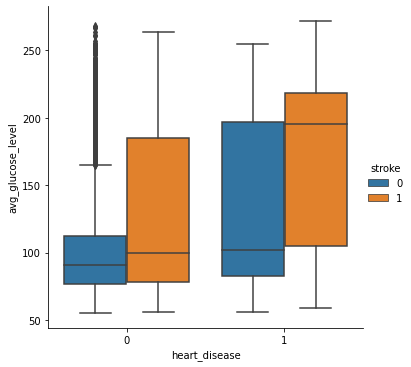

In [39]:
sns.catplot(x="heart_disease", y="bmi",hue='stroke' ,kind="box", data=data)
sns.catplot(x="heart_disease", y="age",hue='stroke' ,kind="box", data=data)
sns.catplot(x="heart_disease", y="avg_glucose_level",hue='stroke' ,kind="box", data=data)

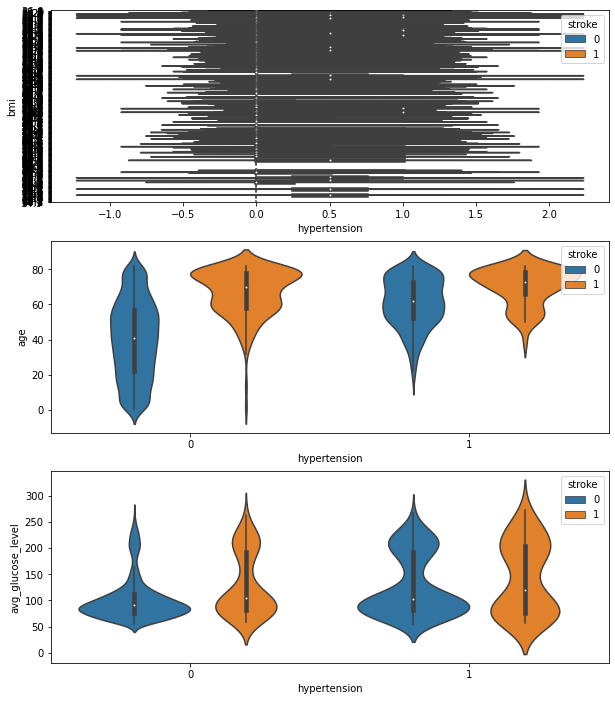

In [40]:
plt.figure(figsize=(10,12))
plt.subplot(3,1,1)
sns.violinplot(x = 'hypertension', y="bmi",hue='stroke', data = data)
plt.subplot(3,1,2)
sns.violinplot(x = 'hypertension', y = 'age',hue='stroke', data = data)
plt.subplot(3,1,3)
sns.violinplot(x = 'hypertension', y = 'avg_glucose_level',hue='stroke', data = data)
plt.show()

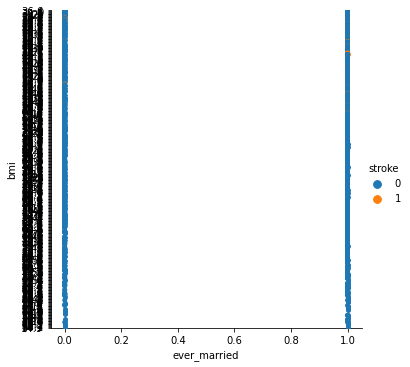

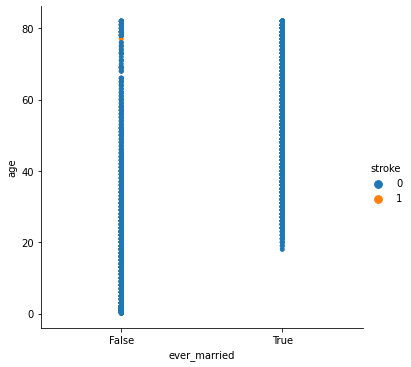

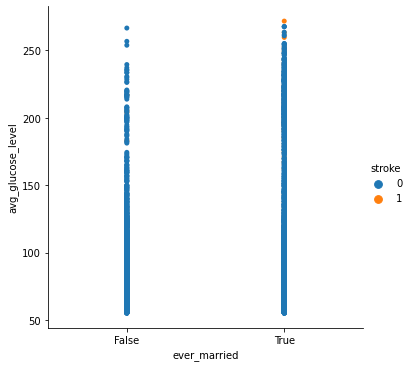

In [42]:
sns.catplot(x="ever_married", y="bmi", hue='stroke',jitter=False, data=data)
sns.catplot(x="ever_married", y="age", hue='stroke',jitter=False, data=data)
sns.catplot(x="ever_married", y="avg_glucose_level", hue='stroke',jitter=False, data=data)

###  Correlation among the attributes

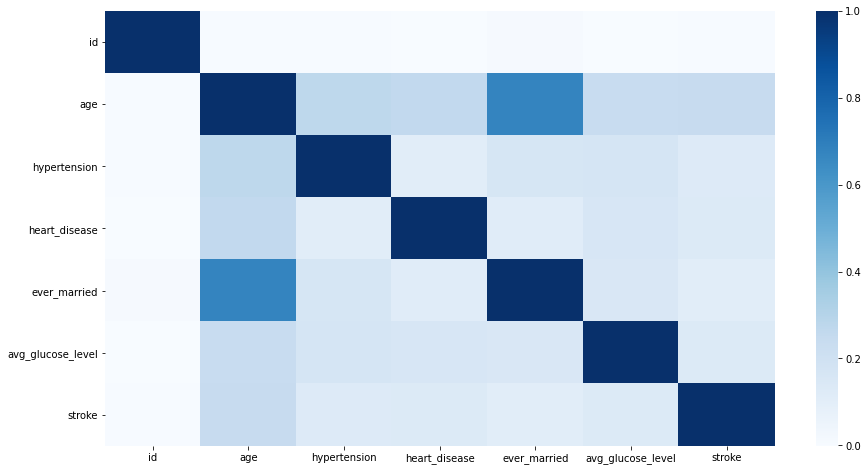

In [46]:
plt.figure(figsize=(15,8))
sns.heatmap(data.corr(),cmap="Blues");

In [47]:
data.corr()

id       age  hypertension  heart_disease  \
id                 1.000000  0.003538      0.003550      -0.001296   
age                0.003538  1.000000      0.276398       0.263796   
hypertension       0.003550  0.276398      1.000000       0.108306   
heart_disease     -0.001296  0.263796      0.108306       1.000000   
ever_married       0.013690  0.679125      0.164243       0.114644   
avg_glucose_level  0.001092  0.238171      0.174474       0.161857   
stroke             0.006388  0.245257      0.127904       0.134914   

                   ever_married  avg_glucose_level    stroke  
id                     0.013690           0.001092  0.006388  
age                    0.679125           0.238171  0.245257  
hypertension           0.164243           0.174474  0.127904  
heart_disease          0.114644           0.161857  0.134914  
ever_married           1.000000           0.155068  0.108340  
avg_glucose_level      0.155068           1.000000  0.131945  
stroke                 0.108340           0.131945  1.000000

From the above matrix and table, we can see that age is more correlated to stroke, after that heart disease and avg glucose label.

As the data contains categorial feature so we will convert it into numerical value by doing encoding.

# -

In [5]:
data.info()
# contains null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
id                   5110 non-null int64
gender               5110 non-null object
age                  5110 non-null float64
hypertension         5110 non-null int64
heart_disease        5110 non-null int64
ever_married         5110 non-null bool
work_type            5110 non-null object
Residence_type       5110 non-null object
avg_glucose_level    5110 non-null float64
bmi                  5110 non-null object
smoking_status       5110 non-null object
stroke               5110 non-null int64
dtypes: bool(1), float64(2), int64(4), object(5)
memory usage: 444.3+ KB


In [6]:
data.describe()

id          age  hypertension  heart_disease  \
count   5110.000000  5110.000000   5110.000000    5110.000000   
mean   36517.829354    43.226614      0.097456       0.054012   
std    21161.721625    22.612647      0.296607       0.226063   
min       67.000000     0.080000      0.000000       0.000000   
25%    17741.250000    25.000000      0.000000       0.000000   
50%    36932.000000    45.000000      0.000000       0.000000   
75%    54682.000000    61.000000      0.000000       0.000000   
max    72940.000000    82.000000      1.000000       1.000000   

       avg_glucose_level       stroke  
count        5110.000000  5110.000000  
mean          106.147677     0.048728  
std            45.283560     0.215320  
min            55.120000     0.000000  
25%            77.245000     0.000000  
50%            91.885000     0.000000  
75%           114.090000     0.000000  
max           271.740000     1.000000

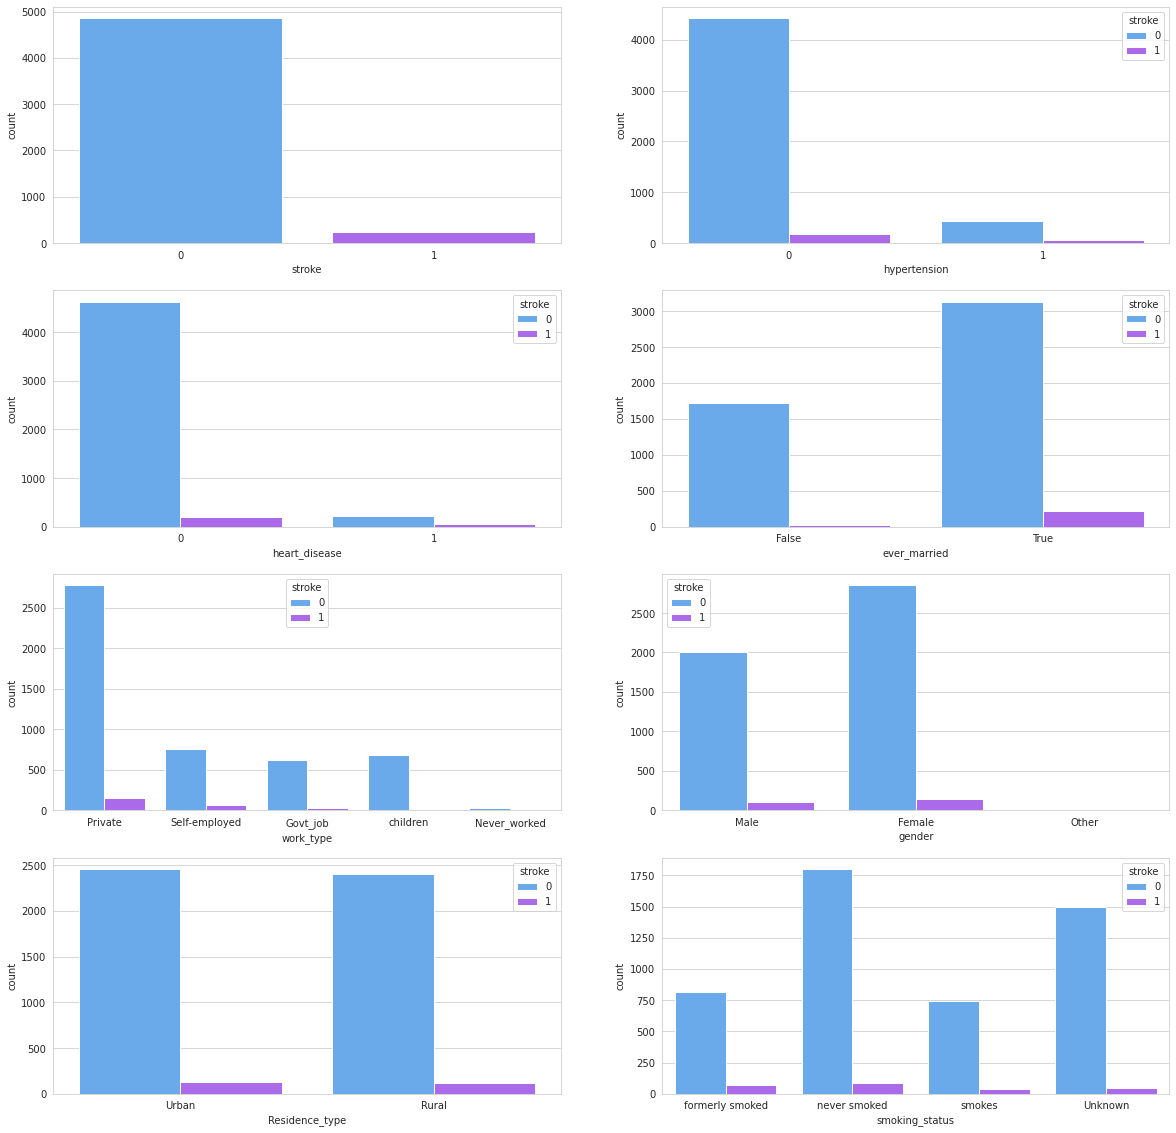

In [7]:
sns.set_style('whitegrid')
fig,ax = plt.subplots(4,2,figsize=(20,20))
ax = ax.flatten()
sns.countplot(data=data,x='stroke',ax=ax[0],palette='cool')
sns.countplot(data=data,x='hypertension',ax=ax[1],hue='stroke',palette='cool')
sns.countplot(data=data,x='heart_disease',ax=ax[2],hue='stroke',palette='cool')
sns.countplot(data=data,x='ever_married',ax=ax[3],hue='stroke',palette='cool')
sns.countplot(data=data,x='work_type',ax=ax[4],hue='stroke',palette='cool')
sns.countplot(data=data,x='gender',ax=ax[5],hue='stroke',palette='cool')
sns.countplot(data=data,x='Residence_type',ax=ax[6],hue='stroke',palette='cool')
sns.countplot(data=data,x='smoking_status',ax=ax[7],hue='stroke',palette='cool')
plt.show()

# The dataset is unevenly distributed

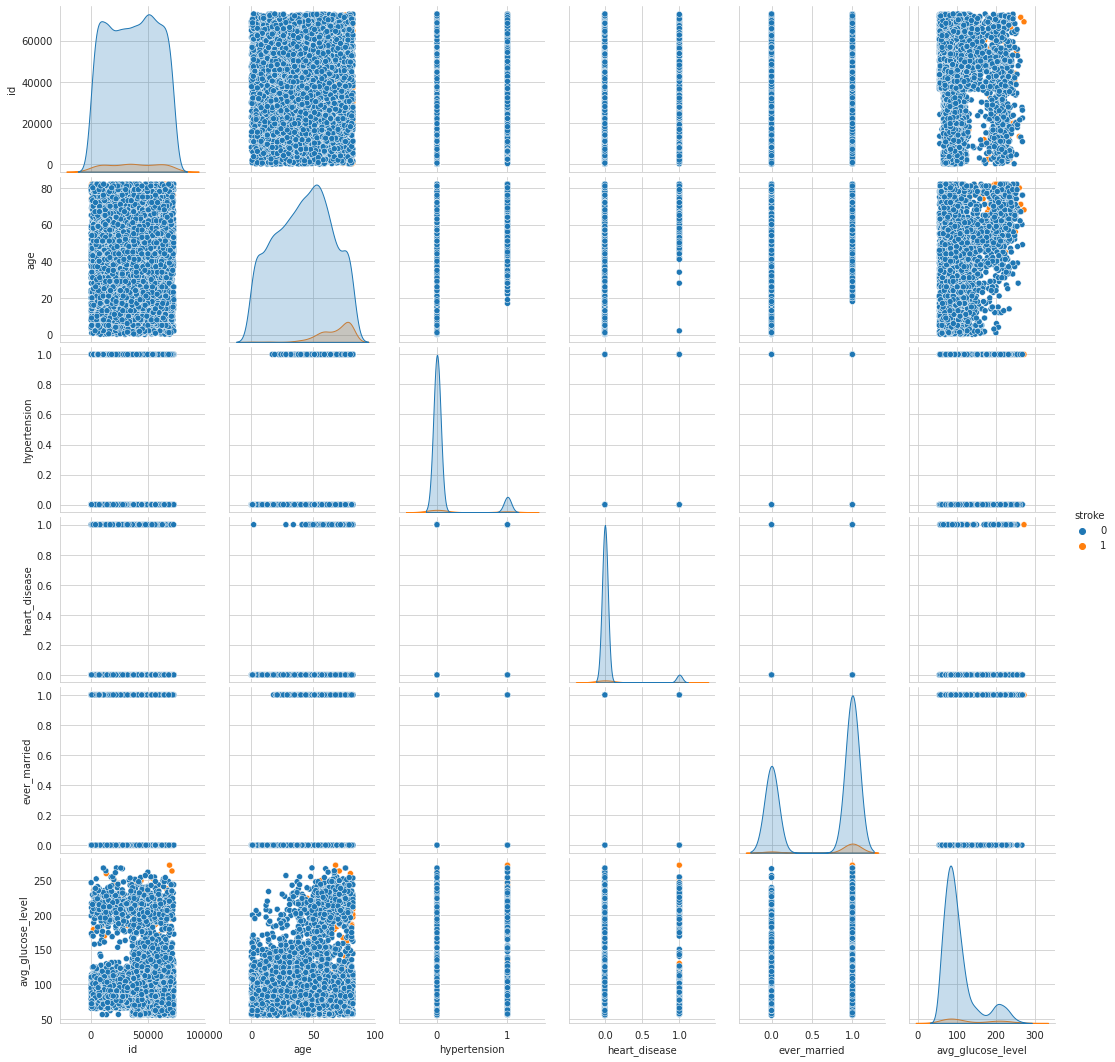

In [9]:
sns.pairplot(data=data,hue='stroke')
plt.show()